In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./噪声对分类性能影响.csv")

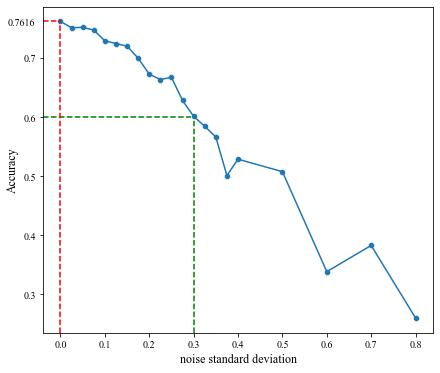

In [6]:
plt.figure(figsize=(7, 6))

sns.scatterplot(x="noise standard deviation", y="accuracy", data=df)
sns.lineplot(x="noise standard deviation", y="accuracy", data=df)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("noise standard deviation", fontsize=12)
plt.axvline(0.3, 0, 0.66, color="green", linestyle="--")
plt.axhline(0.6, 0, 0.38, color="green", linestyle="--")
plt.axvline(0.0, 0, 0.96, color="red", linestyle="--")
plt.axhline(0.7616, 0, 0.045, color="red", linestyle="--")
plt.text(-0.12, 0.755, "0.7616")
#plt.savefig("./噪声对分类性能的影响.svg", dpi=600, bbox_inches='tight')
plt.savefig("./噪声对分类性能影响图.pdf", dpi=600, bbox_inches='tight')

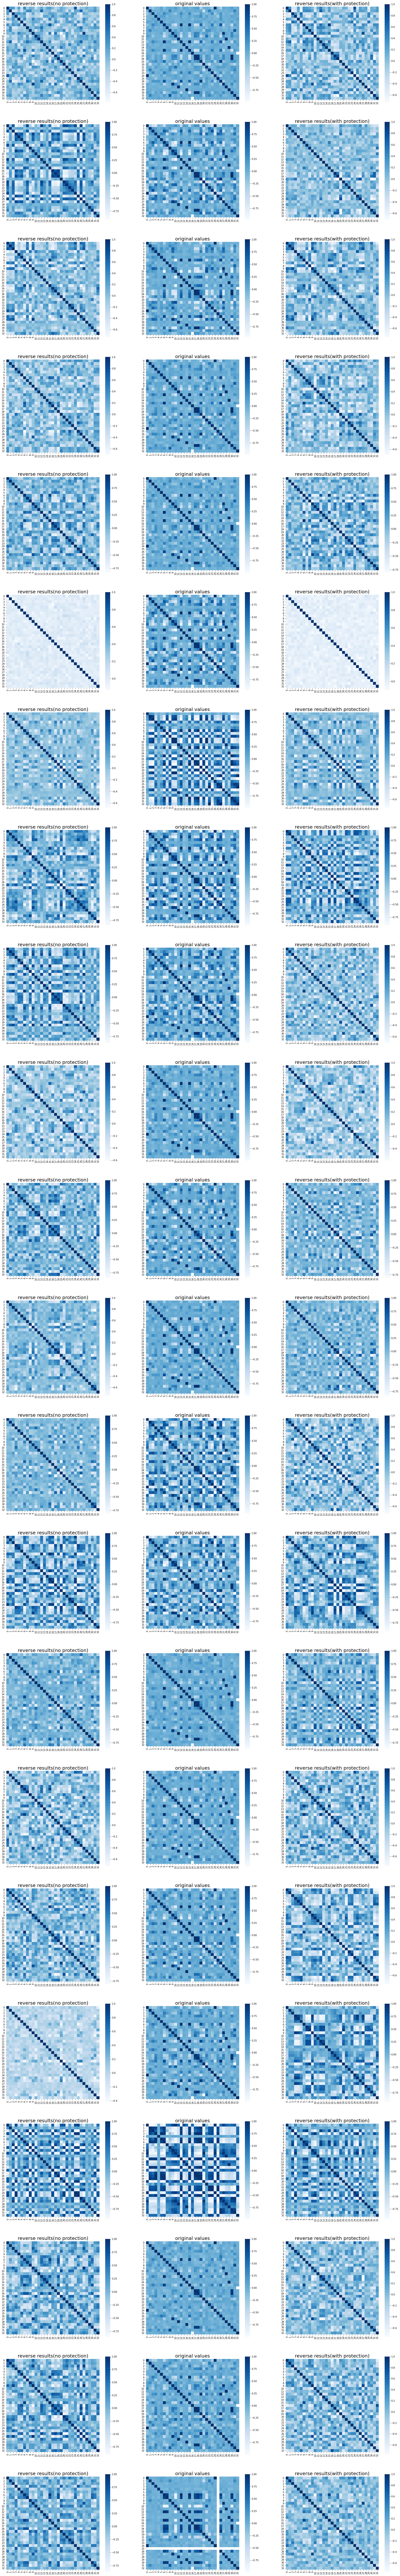

In [7]:
# 比较mia攻击结果与original的相对关系
plt.figure(figsize=(30, 200))
for i in range(22):
    reverse_result = pd.read_csv("./reverse_result/600result_"+str(i)+".csv", index_col=0)
    d1 = reverse_result.corr()
    original = np.load(r"C:\Users\lzl_z\Desktop\python-workspace\论文\Data leakage and privacy protection in industrial federation learning\data\TE\classify\train_data.npy")[0+600*i:600+600*i, :]
    d2 = pd.DataFrame(index=range(600), columns=range(33), data=original).corr()
    reverse_result_protected = pd.read_csv("./reverse_result_protected/600result_"+str(i)+".csv", index_col=0)
    d3 = reverse_result_protected.corr()
    plt.subplot(22, 3, 1+3*i)
    sns.heatmap(d1,annot = False,vmax = 1,square = True,cmap = "Blues")
    plt.title("reverse results(no protection)", fontsize=20)
    plt.subplot(22, 3, 2+3*i)
    sns.heatmap(d2,annot = False,vmax = 1,square = True,cmap = "Blues")
    plt.title("original values", fontsize=20)
    plt.subplot(22, 3, 3+3*i)
    sns.heatmap(d3,annot = False,vmax = 1,square = True,cmap = "Blues")
    plt.title("reverse results(with protection)", fontsize=20)
plt.savefig("./相对值比较.pdf", dpi=300, bbox_inches='tight')
plt.show()